In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
import pandas as pd

In [3]:
df=pd.read_csv('iris.data.txt')
df.replace('?',-99999,inplace=True)
df.replace('Iris-setosa',0,inplace=True)
df.replace('Iris-versicolor',1,inplace=True)
df.replace('Iris-virginica',2,inplace=True)
full_data=df.astype(float).values.tolist()

In [4]:
full_data

[[5.1, 3.5, 1.4, 0.2, 0.0],
 [4.9, 3.0, 1.4, 0.2, 0.0],
 [4.7, 3.2, 1.3, 0.2, 0.0],
 [4.6, 3.1, 1.5, 0.2, 0.0],
 [5.0, 3.6, 1.4, 0.2, 0.0],
 [5.4, 3.9, 1.7, 0.4, 0.0],
 [4.6, 3.4, 1.4, 0.3, 0.0],
 [5.0, 3.4, 1.5, 0.2, 0.0],
 [4.4, 2.9, 1.4, 0.2, 0.0],
 [4.9, 3.1, 1.5, 0.1, 0.0],
 [5.4, 3.7, 1.5, 0.2, 0.0],
 [4.8, 3.4, 1.6, 0.2, 0.0],
 [4.8, 3.0, 1.4, 0.1, 0.0],
 [4.3, 3.0, 1.1, 0.1, 0.0],
 [5.8, 4.0, 1.2, 0.2, 0.0],
 [5.7, 4.4, 1.5, 0.4, 0.0],
 [5.4, 3.9, 1.3, 0.4, 0.0],
 [5.1, 3.5, 1.4, 0.3, 0.0],
 [5.7, 3.8, 1.7, 0.3, 0.0],
 [5.1, 3.8, 1.5, 0.3, 0.0],
 [5.4, 3.4, 1.7, 0.2, 0.0],
 [5.1, 3.7, 1.5, 0.4, 0.0],
 [4.6, 3.6, 1.0, 0.2, 0.0],
 [5.1, 3.3, 1.7, 0.5, 0.0],
 [4.8, 3.4, 1.9, 0.2, 0.0],
 [5.0, 3.0, 1.6, 0.2, 0.0],
 [5.0, 3.4, 1.6, 0.4, 0.0],
 [5.2, 3.5, 1.5, 0.2, 0.0],
 [5.2, 3.4, 1.4, 0.2, 0.0],
 [4.7, 3.2, 1.6, 0.2, 0.0],
 [4.8, 3.1, 1.6, 0.2, 0.0],
 [5.4, 3.4, 1.5, 0.4, 0.0],
 [5.2, 4.1, 1.5, 0.1, 0.0],
 [5.5, 4.2, 1.4, 0.2, 0.0],
 [4.9, 3.1, 1.5, 0.1, 0.0],
 [5.0, 3.2, 1.2, 0.2

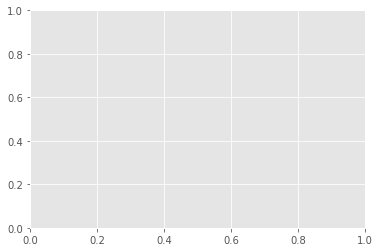

In [5]:
class K_Means:
    fig = plt.figure()
    ax1 = fig.add_subplot(1,1,1)
    def __init__(self, k=2, tol=0.001, max_iter=300): #tolerance for checking previous and new centroids have min change
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):
        #centroid dict
        self.centroids = {}
        # since k=2 we will select first two points from the data and we will declare that as a centroid
        diff=[]
        k=[]
        for i in range(self.k):
            self.centroids[i] = data[i]
        
        # we will run this loop for 300 times (300 iteration)
        for i in range(self.max_iter):
            self.classifications = {}  #{0: [], 1: []}

            for l in range(self.k):
                self.classifications[l] = []

            for featureset in data:  #finding distance from centroid , finding mini value , putting them in classification
                distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in 
                                                                                    self.centroids]
                classification = distances.index(min(distances)) #find the index of the min distance which belongs to class itself

                self.classifications[classification].append(featureset)
    

            prev_centroids = dict(self.centroids)
          
            for classification in self.classifications:

                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
                #print(self.centroids)
            optimized = True
            def animate(i):
                xar = centroids[centroid][0]
                yar = centroids[centroid][1]
                ax1.clear()
                ax1.plot(xar,yar)
                
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    optimized = False
            diff.append(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
            k.append(i)
            
            #ani = animation.FuncAnimation(fig, animate, interval=1000)
            
            
            if optimized:
                break
        plt.xlabel("ITR")
        plt.ylabel("Difference")
        plt.plot(k,diff)
        plt.show()
            
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification


In [6]:
clf = K_Means()
clf.fit(full_data)

TypeError: unsupported operand type(s) for -: 'list' and 'list'